### 06. Tips 
- Maximun Likeihood Estimation
- Optimization, Gradient Descent 
- Overfitting, Regularization 
- Data Split (Training, Test)
- Learning rate
- Data processing 

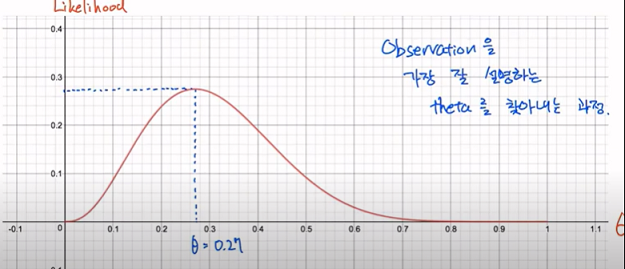

In [2]:
from IPython.display import Image
Image('img/MLE.PNG')

- MLE는 관측한 결과를 가장 잘 설명하는 세타를 찾는 과정 
  - ex. 압정을 100회 던졌을때 바로 설 확률이 0.27 
- 세타가 0.27일때 y값, 즉 Likeihood가 Max가 된다. 
- Max값을 찾는 방법은 기울기를 미분하면 되는데, 이것을 Gradient Decent라 한다. 
- Gradient Decent의 약점인 overfitting을 피하기 위해, Training/Test 데이터셋 구분과 lr의 적절한 조정 필요 
- 딥러닝에서는 Network size를 줄이거나, Weight 조정, DropOut 등을 통해 Regularization을 실행하여 Overfitting을 방지한다. 

- 실전코딩 
    1. training set 훈련 후, test set을 통해 검정
    2. Training, Test(validation)을 위한 함수 정의 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## datasets 
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

In [2]:
## model : input 3 --> output 3 
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    def forward(self, x):
        return self.linear(x)

In [60]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr= 0.1)
## learning rate의 조정은 정답이 없다. 훈련반복에서 cost의 감소폭을 보고 판단하라 

In [61]:
## training model 
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs+1):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.cross_entropy(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.4f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [62]:
## test(validation) model 
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {:.3f}% Cost: {:.4f}'.format(
         correct_count / len(y_test) * 100, cost.item()
    ))

In [63]:
## let's do it! 
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.1892
Epoch    1/20 Cost: 1.1225
Epoch    2/20 Cost: 1.0915
Epoch    3/20 Cost: 1.0679
Epoch    4/20 Cost: 1.0520
Epoch    5/20 Cost: 1.0396
Epoch    6/20 Cost: 1.0288
Epoch    7/20 Cost: 1.0193
Epoch    8/20 Cost: 1.0104
Epoch    9/20 Cost: 1.0022
Epoch   10/20 Cost: 0.9943
Epoch   11/20 Cost: 0.9868
Epoch   12/20 Cost: 0.9796
Epoch   13/20 Cost: 0.9727
Epoch   14/20 Cost: 0.9660
Epoch   15/20 Cost: 0.9594
Epoch   16/20 Cost: 0.9531
Epoch   17/20 Cost: 0.9469
Epoch   18/20 Cost: 0.9409
Epoch   19/20 Cost: 0.9351
Epoch   20/20 Cost: 0.9294


In [64]:
test(model, optimizer, x_test, y_test)

Accuracy: 100.000% Cost: 0.2693


- 데이터 전처리의 중요성

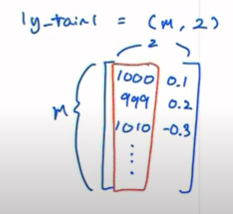

In [65]:
from IPython.display import Image
Image('img/preprocessing.PNG')

- ex. 위와같이 결과값이 2차원 이상인 경우, 정규화 하지 않으면 상대적으로 작은 값들로 구성된 두번째 컬럼은 학습에서 무시될 것이다. 

In [68]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])

y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

mu = x_train.mean(dim=0)
sigma = x_train.std(dim=0)
norm_x_train = (x_train - mu) / sigma   ## x_train을 정규분포로 변환 

## define model 
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

## define training 
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [69]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29530.394531
Epoch    1/20 Cost: 18759.080078
Epoch    2/20 Cost: 11965.138672
Epoch    3/20 Cost: 7646.029785
Epoch    4/20 Cost: 4890.238281
Epoch    5/20 Cost: 3128.983887
Epoch    6/20 Cost: 2002.488525
Epoch    7/20 Cost: 1281.732178
Epoch    8/20 Cost: 820.501953
Epoch    9/20 Cost: 525.325623
Epoch   10/20 Cost: 336.411072
Epoch   11/20 Cost: 215.501556
Epoch   12/20 Cost: 138.113739
Epoch   13/20 Cost: 88.579910
Epoch   14/20 Cost: 56.872612
Epoch   15/20 Cost: 36.574512
Epoch   16/20 Cost: 23.578697
Epoch   17/20 Cost: 15.256351
Epoch   18/20 Cost: 9.925320
Epoch   19/20 Cost: 6.508821
